C:\Users\joshi\AppData\Local\Temp\ipykernel_1744\3993892346.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


  CountryRegionCode  Sales_Ytd  Sales_LastYear
0                US   26411059        19402504
1                CA    6771829         5693988
2                AU    5977814         2278548
3                GB    5012905         1635823
4                FR    4772398         2396539
5                DE    3805202         1307949


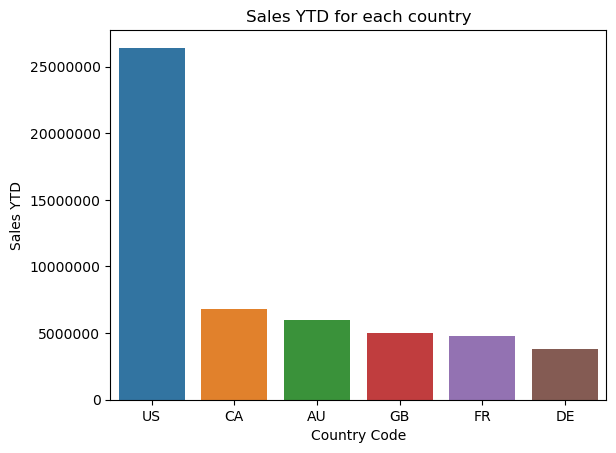

        Name CountryRegionCode  SalesYTD  SalesLastYear
0  Southwest                US  10510853        5366575
1  Northwest                US   7887186        3298694
2    Central                US   3072175        3205014
3  Southeast                US   2538667        3925071
4  Northeast                US   2402176        3607148


C:\Users\joshi\AppData\Local\Temp\ipykernel_1744\3993892346.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql_query(sql_query1, conn)


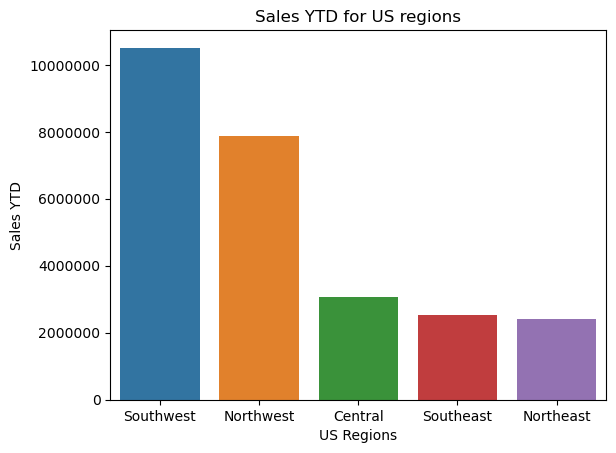

In [1]:
# My task was to explore the AdventureWorks Sample database and I chose to use the OLTP version of AdventureWorks2022. 
# It was important that I started with the same SQL tools so that my queries will work across different systems. 
# I then explored the schema by using the diagram visualisation to understand how the tables are linked together. 
# I picked the tables that I found most relevant to my analysis and also understood how the tables are linked by their keys. 
# I performed another step by importing the whole database into Power BI because I know that PowerBI is a very powerful tool that 
# can let us do very quick visualisations and analysis of data. 
# I dentified which tables I need to get the data for each question. 
# My approach to do the analysis was to use the pyodbc package in Python with SQL queries to import the tables that I 
# want into the Python environment and run the analysis using the statistical tools. 



#Q1 What are the regional sales in the best performing country?


import pandas as pd
import pyodbc
import seaborn as sns
import matplotlib.pyplot as plt


server_name = '.'
database_name = 'AdventureWorks2022'
connection_string = f'DRIVER={{SQL Server}};SERVER={server_name};DATABASE={database_name};Trusted_Connection=yes'
conn = pyodbc.connect(connection_string)
cursor = conn.cursor()


# First find the best performing country by running the following query: 
sql_query="""
Select CountryRegionCode, SUM(SalesYTD) as Sales_Ytd, SUM(SalesLastYear)AS Sales_LastYear
from Sales.SalesTerritory
Group By CountryRegionCode
Order By Sales_YTD DESC;
"""
df = pd.read_sql_query(sql_query, conn)
df['Sales_Ytd'] = df['Sales_Ytd']. astype(int) 
df['Sales_LastYear'] = df['Sales_LastYear']. astype(int)
print(df)
ax =sns.barplot(x = 'CountryRegionCode',
            y = 'Sales_Ytd',
            data = df)
# plot.fig.suptitle('Sales YTD for each country')
ax.set(xlabel="Country Code", ylabel="Sales YTD", title='Sales YTD for each country')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Find the regional sales in the best performing country ( which is US) by running the following query: 

sql_query1 = """
Select Name, CountryRegionCode, SalesYTD, SalesLastYear
From Sales.SalesTerritory
where CountryRegionCode='US'
ORDER BY SalesYTD DESC;
"""
df1 = pd.read_sql_query(sql_query1, conn)
df1['SalesYTD'] = df1['SalesYTD']. astype(int) 
df1['SalesLastYear'] = df1['SalesLastYear']. astype(int)
print(df1)

ax = sns.barplot(x = 'Name',
            y = 'SalesYTD',
            data = df1)

ax.set(xlabel="US Regions", ylabel="Sales YTD", title='Sales YTD for US regions')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

C:\Users\joshi\AppData\Local\Temp\ipykernel_1744\1031675481.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)
C:\Users\joshi\AppData\Local\Temp\ipykernel_1744\1031675481.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql_query(sql_query1, conn)


                JobTitle NationalIDNumber      SalesYTD  SalesLastYear  \
0   Sales Representative         61161660  1.352577e+06   1.927059e+06   
1   Sales Representative        987554265  1.573013e+06   1.371635e+06   
2   Sales Representative        615389812  3.189418e+06   1.997186e+06   
3   Sales Representative        139397894  2.458536e+06   2.073506e+06   
4   Sales Representative        191644724  4.251369e+06   1.439156e+06   
5   Sales Representative        716374314  2.315186e+06   1.849641e+06   
6   Sales Representative        399771412  2.604541e+06   2.038235e+06   
7   Sales Representative        234474252  1.453719e+06   1.620277e+06   
8   Sales Representative        134219713  3.121616e+06   2.396540e+06   
9   Sales Representative        954276278  1.827067e+06   1.307950e+06   
10  Sales Representative        758596752  1.421811e+06   2.278549e+06   
11  Sales Representative        668991357  4.116871e+06   1.635823e+06   
12  Sales Representative        841560

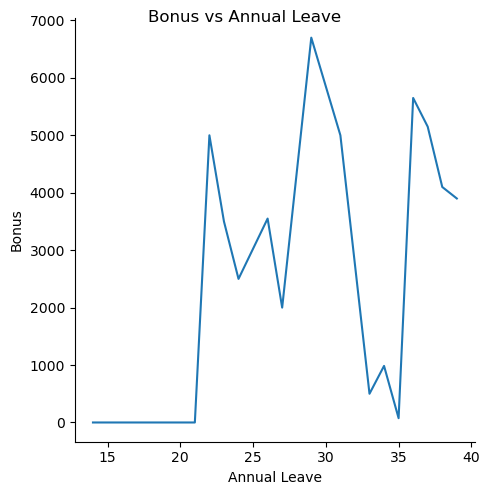

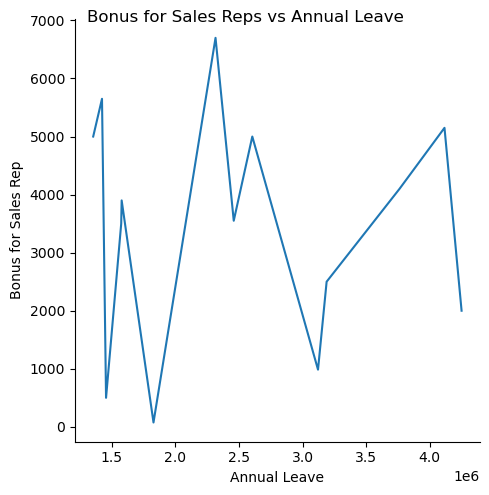

Correlation between Bonus and Annual Leave:                Annual_Leave     Bonus
Annual_Leave      1.000000  0.382107
Bonus             0.382107  1.000000
Correlation between Bonus for Sales Reps and Annual Leave:                Annual_Leave     Bonus
Annual_Leave      1.000000 -0.041494
Bonus            -0.041494  1.000000


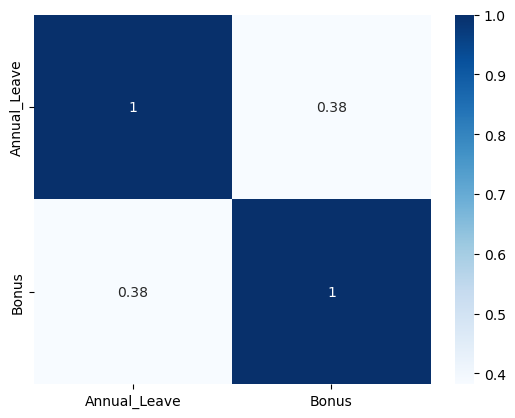

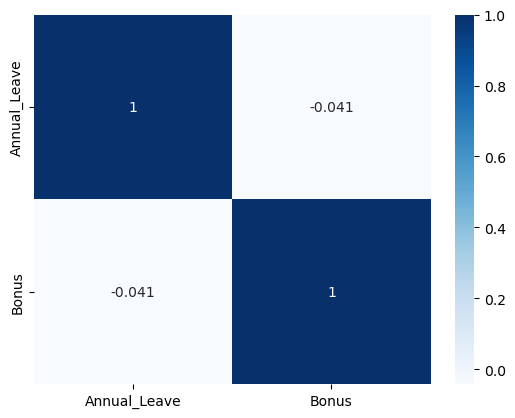

In [2]:
#Q2 What is the relationship between annual leave taken and bonus?

import pandas as pd
import pyodbc
import seaborn as sns
import matplotlib.pyplot as plt



server_name = '.'
database_name = 'AdventureWorks2022'
connection_string = f'DRIVER={{SQL Server}};SERVER={server_name};DATABASE={database_name};Trusted_Connection=yes'
conn = pyodbc.connect(connection_string)
cursor = conn.cursor()



sql_query="""
Select JobTitle, NationalIDNumber, SalesYTD, SalesLastYear, Sales.SalesPerson.Bonus, HumanResources.Employee.VacationHours AS Annual_Leave
From Sales.SalesPerson
Inner join HumanResources.Employee
on Sales.SalesPerson.BusinessEntityID = HumanResources.Employee.BusinessEntityID
ORDER BY Annual_Leave
"""
df = pd.read_sql_query(sql_query, conn)
# calculate correlation between Bonus and Annual Leave
sql_query1="""
Select JobTitle, NationalIDNumber, SalesYTD, SalesLastYear, Sales.SalesPerson.Bonus, HumanResources.Employee.VacationHours AS Annual_Leave
From Sales.SalesPerson
Inner join HumanResources.Employee
on Sales.SalesPerson.BusinessEntityID = HumanResources.Employee.BusinessEntityID
WHERE Bonus>0
ORDER BY Annual_Leave
"""
df1 = pd.read_sql_query(sql_query1, conn)
print(df1)


plot = sns.relplot(x="Annual_Leave", y="Bonus", data=df, kind='line')
plot.fig.suptitle('Bonus vs Annual Leave')
plot.set(xlabel="Annual Leave", ylabel="Bonus")
plt.show()


plot = sns.relplot(x="SalesYTD", y="Bonus", data=df1, kind='line')
plot.fig.suptitle('Bonus for Sales Reps vs Annual Leave')
plot.set(xlabel="Annual Leave", ylabel="Bonus for Sales Rep")
plt.show()



print('Correlation between Bonus and Annual Leave: ', df[['Annual_Leave','Bonus']].corr())
print('Correlation between Bonus for Sales Reps and Annual Leave: ', df1[['Annual_Leave','Bonus']].corr())

# The correlation between Bonus and Annual Leave is weak as calculated using .corr method above
sns.heatmap(df[['Annual_Leave','Bonus']].corr(), annot = True, fmt='.2g',cmap= 'Blues')
plt.show()
# Correlation between Bonus and Annual Leave for Non-Managerial sales staff is shown in a heatmap below
sns.heatmap(df1[['Annual_Leave','Bonus']].corr(), annot = True, fmt='.2g',cmap= 'Blues')
plt.show()


  Country  TotalYTDSales
0      US       26411059
1      CA        6771829
2      AU        5977814
3      GB        5012905
4      FR        4772398
5      DE        3805202


C:\Users\joshi\AppData\Local\Temp\ipykernel_1744\3418809131.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql_query(sql_query, conn)


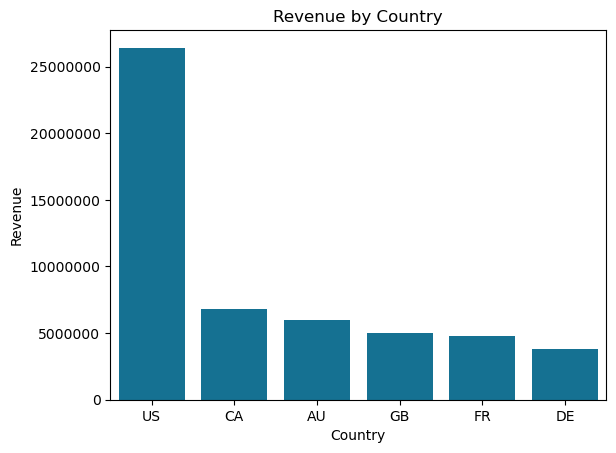

C:\Users\joshi\AppData\Local\Temp\ipykernel_1744\3418809131.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  stores = pd.read_sql_query(sql_query, conn)


  Countryname  StoreNumbers
0          US           427
1          CA           114
2          FR            40
3          DE            40
4          GB            40
5          AU            40


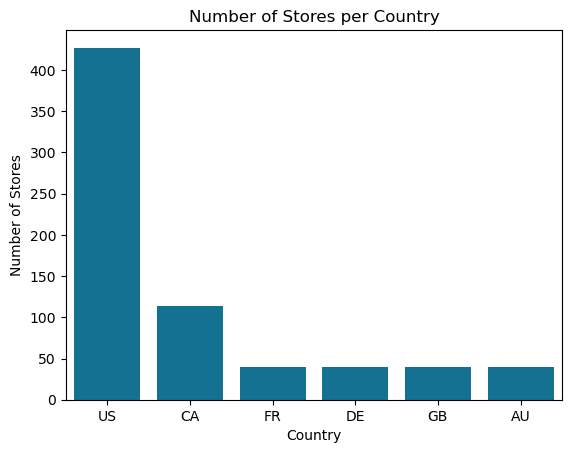

C:\Users\joshi\AppData\Local\Temp\ipykernel_1744\3418809131.py:64: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  child = pd.read_sql_query(sql_query, conn)


   Children         Country
0     15719   United States
1      5863       Australia
2      3328          Canada
3      3152          France
4      3111  United Kingdom
5      2964         Germany


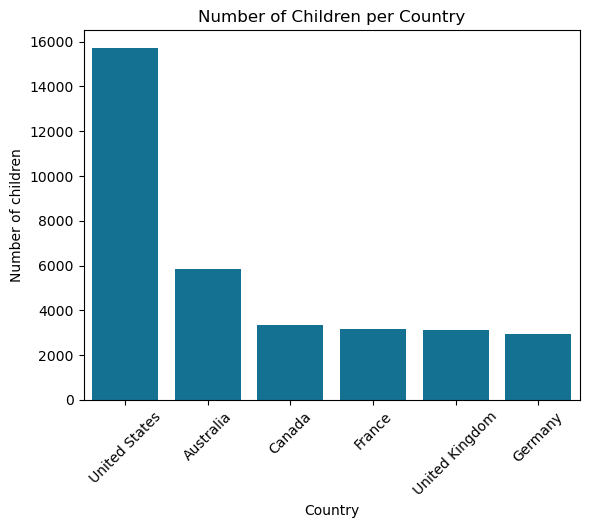

C:\Users\joshi\AppData\Local\Temp\ipykernel_1744\3418809131.py:87: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql_query(sql_query, conn)


           YearlyIncome  count         Country
0           25001-50000    434       Australia
1           50001-75000   1186       Australia
2          75001-100000   1009       Australia
3               0-25000    628       Australia
4   greater than 100000    334       Australia
5           50001-75000    610          Canada
6           25001-50000    643          Canada
7          75001-100000    253          Canada
8   greater than 100000     26          Canada
9               0-25000     39          Canada
10  greater than 100000     36          France
11         75001-100000    258          France
12          25001-50000    671          France
13              0-25000    793          France
14          50001-75000     52          France
15          50001-75000     11         Germany
16              0-25000    662         Germany
17  greater than 100000    215         Germany
18          25001-50000    736         Germany
19         75001-100000    156         Germany
20          2

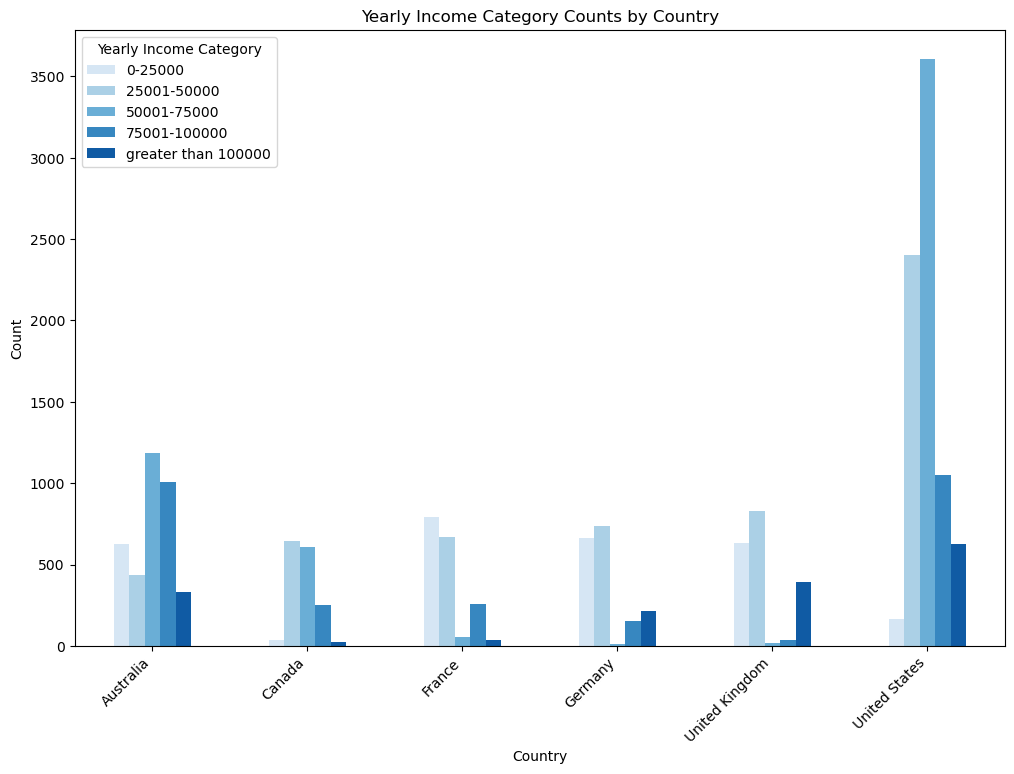

In [3]:
#Q3 What is the relationship between Country and Revenue?
# SQL query for country and revenue
sql_query = """
Select CountryRegionCode as Country , Sum(SalesYTD) as TotalYTDSales
FROM Sales.SalesTerritory
GROUP BY CountryRegionCode
ORDER BY TotalYTDSales DESC
"""
df3 = pd.read_sql_query(sql_query, conn)

df3['TotalYTDSales'] = df3['TotalYTDSales'].astype(int)
print(df3)



ax =sns.barplot(x = 'Country',
            y = 'TotalYTDSales',
            data = df3, color='#007BA7')
# plot.fig.suptitle('Sales YTD for each country')
ax.set(xlabel="Country", ylabel="Revenue", title='Revenue by Country')
plt.ticklabel_format(style='plain', axis='y')
plt.show()




# SQL query for country and number of stores
sql_query = """
Select territory.CountryRegionCode as Countryname, COUNT(DISTINCT(sales.StoreID)) as StoreNumbers
From Sales.SalesTerritory as territory
JOIN Sales.Customer as sales
ON sales.TerritoryID = territory.TerritoryID
Group by CountryRegionCode
Order by StoreNumbers DESC
"""

stores = pd.read_sql_query(sql_query, conn)
print(stores)


ax1 =sns.barplot(x = 'Countryname',
            y = 'StoreNumbers',
            data = stores, color='#007BA7')
# plot.fig.suptitle('Sales YTD for each country')
ax1.set(xlabel="Country", ylabel="Number of Stores", title='Number of Stores per Country')
plt.ticklabel_format(style='plain', axis='y')
plt.show()



# SQL query for number of children that customers have from the data we have
sql_query = """

SELECT SUM(TotalChildren) as Children, CountryRegionName as Country
  FROM [Sales].[vPersonDemographics] as ch
  JOIN Sales.vIndividualCustomer as shc
  ON ch.BusinessEntityID = shc.BusinessEntityID
  GROUP BY CountryRegionName
  ORDER BY Children DESC
"""

child = pd.read_sql_query(sql_query, conn)
print(child)


ax7 =sns.barplot(x = 'Country',
            y = 'Children',
            data = child, color='#007BA7')
ax7.set(xlabel="Country", ylabel="Number of children", title='Number of Children per Country')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


# SQL query for country and revenue
sql_query = """
select YearlyIncome , count(*) as count, CountryRegionName as Country 
FROM [Sales].[vPersonDemographics] as ch
INNER JOIN Sales.vIndividualCustomer as shc
ON ch.BusinessEntityID = shc.BusinessEntityID

group by YearlyIncome, CountryRegionName
Order by CountryRegionName
"""
df3 = pd.read_sql_query(sql_query, conn)

print(df3)

pivot_table = df3.pivot(index='YearlyIncome', columns='Country', values='count')

print(pivot_table)


df = pd.DataFrame(pivot_table)


# Transpose the DataFrame for easier plotting
df = df.T

# Create a grouped bar chart

blue_palette = sns.color_palette("Blues", len(df.columns))
sns.set_palette(blue_palette)
ax = df.plot(kind='bar', figsize=(12, 8))

ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Yearly Income Category Counts by Country')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Yearly Income Category')
plt.show()


C:\Users\joshi\AppData\Local\Temp\ipykernel_1744\524063150.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql_query(sql_query, conn)


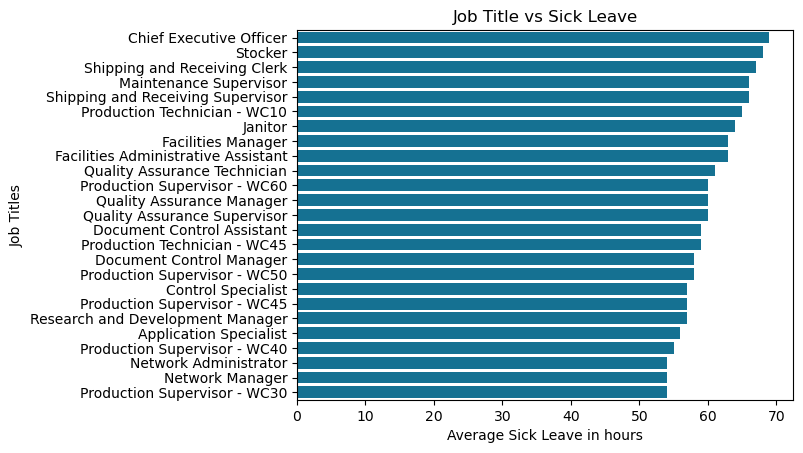

C:\Users\joshi\AppData\Local\Temp\ipykernel_1744\524063150.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  type = pd.read_sql_query(sql_query, conn)


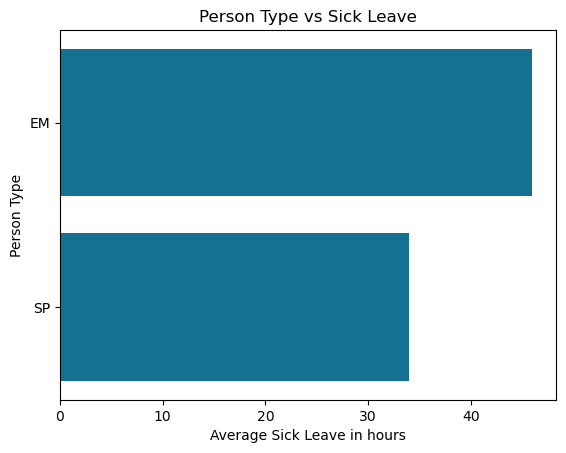

C:\Users\joshi\AppData\Local\Temp\ipykernel_1744\524063150.py:50: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql_query(sql_query, conn)


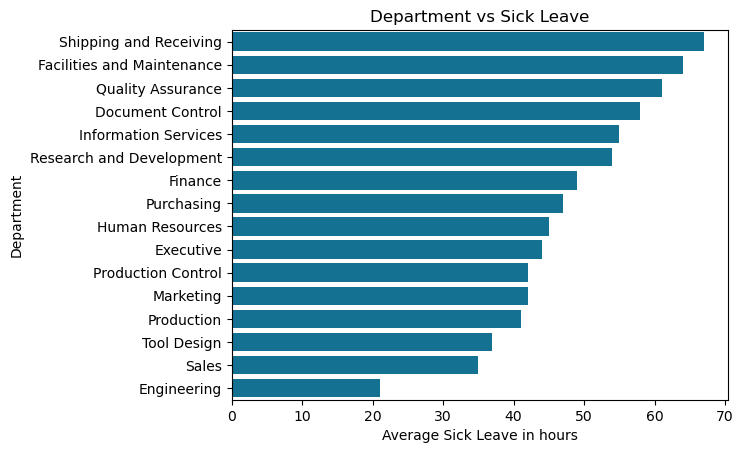

C:\Users\joshi\AppData\Local\Temp\ipykernel_1744\524063150.py:68: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  group = pd.read_sql_query(sql_query, conn)


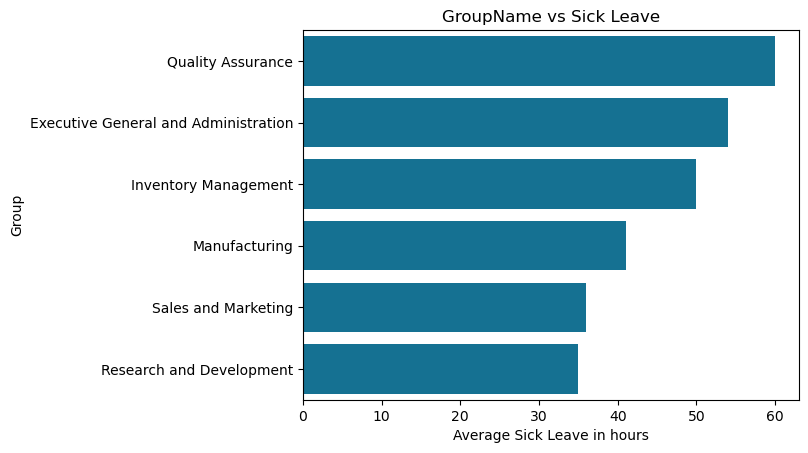

In [4]:
#Q4 What is the relationship between sick leave and Job Title?



import pyodbc
import seaborn as sns
import matplotlib.pyplot as plt

# SQL query for SickLeave vs Job Title. Selecting top 25 job titles only as there is no corelation and to show the data clearly
sql_query = """
Select TOP 25 JobTitle as JobTitles, AVG(SickLeaveHours) as AverageSickLeavehours
From HumanResources.Employee
GROUP BY JobTitle
ORDER BY AverageSickLeavehours DESC
"""
df4 = pd.read_sql_query(sql_query, conn)

ax4 =sns.barplot(x = 'AverageSickLeavehours',
            y = 'JobTitles',
            data = df4, color='#007BA7')
ax4.set(xlabel="Average Sick Leave in hours", ylabel="Job Titles", title='Job Title vs Sick Leave')
plt.show()



# SQL query for SickLeave vs Person Type
sql_query = """
SELECT  (person.PersonType) as Persontype, AVG([SickLeaveHours]) as AveragesickLeave
  FROM [HumanResources].[Employee] employee
  JOIN Person.Person as person
  ON employee.BusinessEntityID = person.BusinessEntityID
  Group by person.PersonType
"""
type = pd.read_sql_query(sql_query, conn)

ax5 =sns.barplot(x = 'AveragesickLeave',
            y = 'Persontype',
            data = type, color='#007BA7')
ax5.set(xlabel="Average Sick Leave in hours", ylabel="Person Type", title='Person Type vs Sick Leave')
plt.show()

# SQL query for Department vs Sick Leave
sql_query = """
Select  h.Department as Department, AVG(e.SickLeaveHours) as SickLeaveHours
FROM HumanResources.Employee as e
JOIN HumanResources.vEmployeeDepartment as h
ON e.JobTitle = h.JobTitle
GROUP BY Department
order by  SickLeaveHours DESC
"""
df4 = pd.read_sql_query(sql_query, conn)

ax4 =sns.barplot(x = 'SickLeaveHours',
            y = 'Department',
            data = df4, color='#007BA7')
ax4.set(xlabel="Average Sick Leave in hours", ylabel="Department", title='Department vs Sick Leave')
plt.show()


# SQL query for Group Name vs SickLeave 
sql_query = """
Select  h.GroupName as GroupName, AVG(e.SickLeaveHours) as SickLeaveHours
FROM HumanResources.Employee as e
JOIN HumanResources.vEmployeeDepartment as h
ON e.JobTitle = h.JobTitle
GROUP BY GroupName
order by  SickLeaveHours DESC
"""
group = pd.read_sql_query(sql_query, conn)



ax5 =sns.barplot(x = 'SickLeaveHours',
            y = 'GroupName',
            data = group, color='#007BA7')
ax5.set(xlabel="Average Sick Leave in hours", ylabel="Group", title='GroupName vs Sick Leave')
plt.show()


C:\Users\joshi\AppData\Local\Temp\ipykernel_1744\1689041570.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  StoreData = pd.read_sql_query(sql_query, conn)


                           Name  NumberOfEmployees  StoreSize    Revenue  \
0                  A Bike Store                  2       7000   95924.02   
1       A Great Bicycle Company                 28      28000   10196.20   
2           A Typical Bike Shop                  8       8000   93981.02   
3    Acceptable Sales & Service                 12      21000    1416.93   
4           Accessories Network                 16      22000    2450.48   
..                          ...                ...        ...        ...   
628   World Bike Discount Store                 38      39000    5537.26   
629              World of Bikes                 17      19000  313671.54   
630   Worthwhile Activity Store                  7       8000  147107.03   
631           Year-Round Sports                 66      75000  167452.60   
632      Yellow Bicycle Company                 29      26000   87227.32   

     TradingDuration  AnnualRevenue  
0                 53        30000.0  
1          

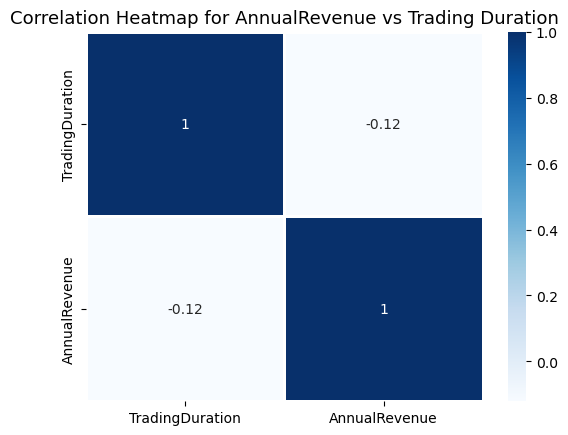

<Figure size 500x500 with 0 Axes>

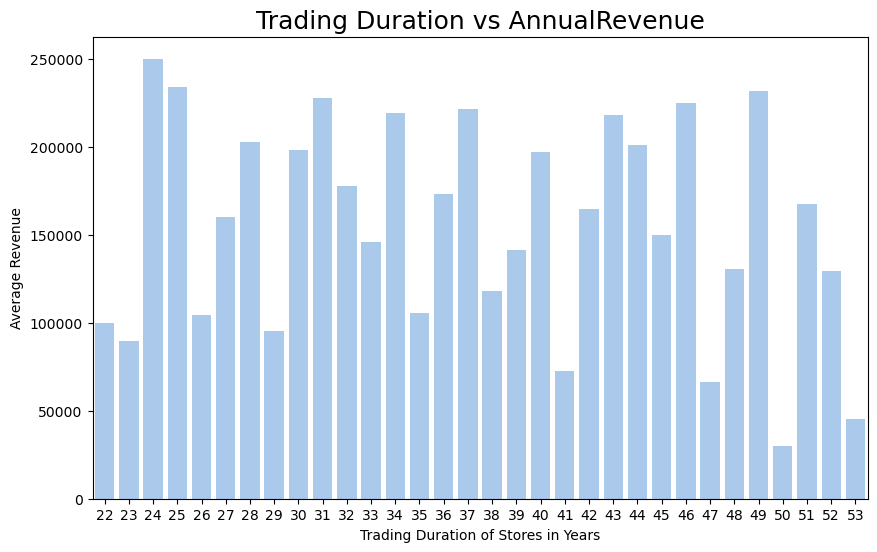

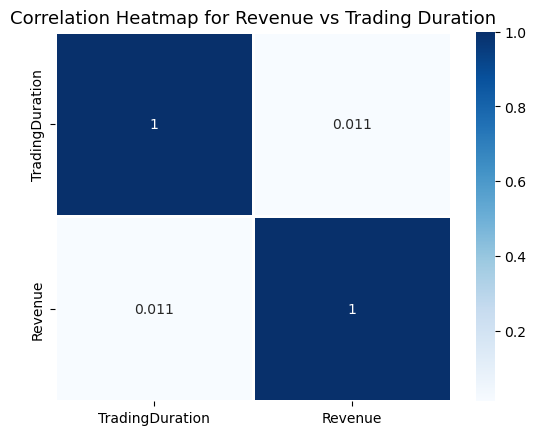

<Figure size 500x500 with 0 Axes>

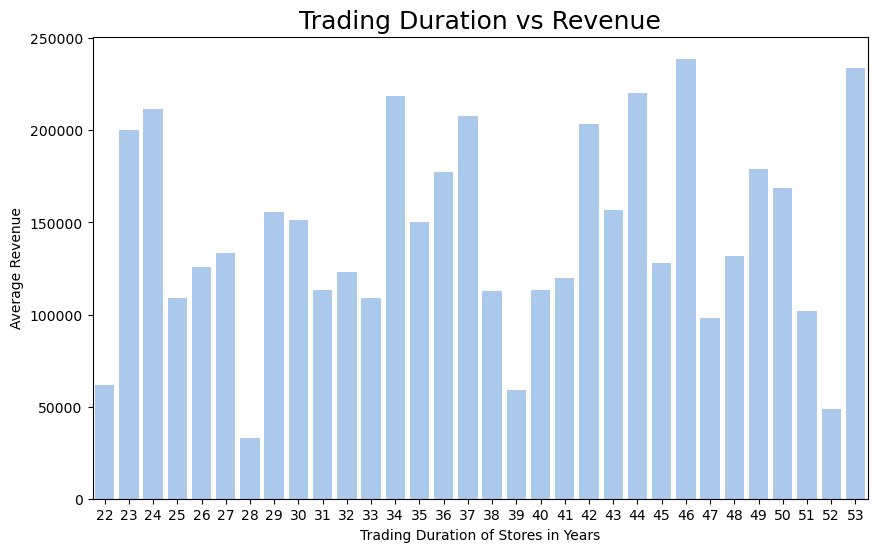

In [5]:
#Q5 What is the relationship between store trading duration and revenue?
#I explored this question using two sets of revenue data.

# Write the SQL query
sql_query = '''SELECT sales.vStoreWithDemographics.Name, 
    MAX(NumberEmployees) AS NumberOfEmployees, 
    MAX(SquareFeet) AS StoreSize, 
    ROUND(SUM(TotalDue),2) as Revenue, 
    MAX(2023 - YearOpened) as TradingDuration, 
    MAX(AnnualRevenue) as AnnualRevenue
FROM sales.vStoreWithDemographics
INNER JOIN sales.Customer ON sales.vStoreWithDemographics.BusinessEntityID = sales.Customer.StoreID
INNER JOIN sales.SalesOrderHeader ON sales.Customer.CustomerID = sales.SalesOrderHeader.CustomerID
GROUP BY Name
ORDER BY sales.vStoreWithDemographics.Name;'''

StoreData = pd.read_sql_query(sql_query, conn)
print(StoreData)

#First do an analysis using the AnnualRevenue column from the table

import seaborn as sns
import matplotlib.pyplot as plt

corrdata = StoreData[['TradingDuration', 'AnnualRevenue']]
corrmatrix = corrdata.corr()

sns.color_palette("pastel")
plt.title('Correlation Heatmap for AnnualRevenue vs Trading Duration', fontsize=13, y=1.0)  
sns.heatmap(corrmatrix, annot=True, linewidth=1, cmap="Blues")
plt.figure(figsize=(5, 5))

plt.figure(figsize=(10,6))
sns.set_color_codes("pastel")
tradingduration = sns.barplot (x='TradingDuration', y='AnnualRevenue', data=StoreData, color='b', errorbar=None)
plt.title('Trading Duration vs AnnualRevenue', fontsize=18)  
tradingduration.set(xlabel='Trading Duration of Stores in Years', ylabel='Average Revenue')

plt.show()

# Repeat the process using the revenue from the sales data.
corrdata = StoreData[['TradingDuration', 'Revenue']]
corrmatrix = corrdata.corr()

sns.color_palette("pastel")
plt.title('Correlation Heatmap for Revenue vs Trading Duration', fontsize=13, y=1.0)  
sns.heatmap(corrmatrix, annot=True, linewidth=1, cmap="Blues")
plt.figure(figsize=(5, 5))

plt.figure(figsize=(10,6))
sns.set_color_codes("pastel")
tradingduration = sns.barplot (x='TradingDuration', y='Revenue', data=StoreData, color='b', errorbar=None)
plt.title('Trading Duration vs Revenue', fontsize=18)  
tradingduration.set(xlabel='Trading Duration of Stores in Years', ylabel='Average Revenue')


plt.show()

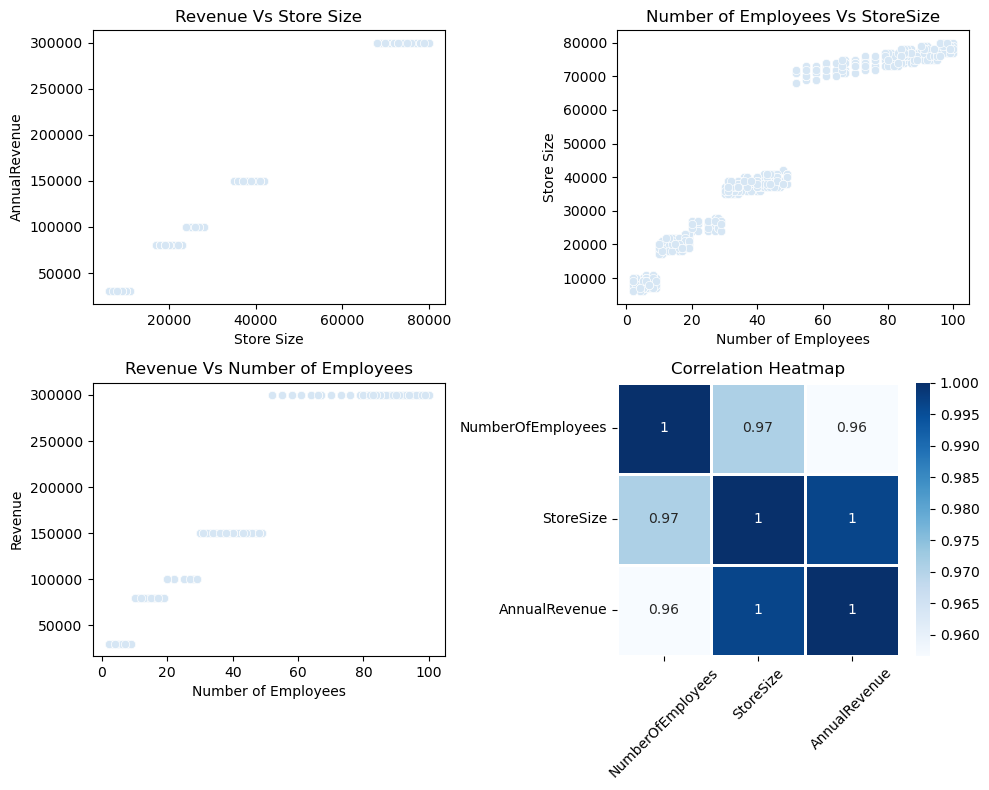

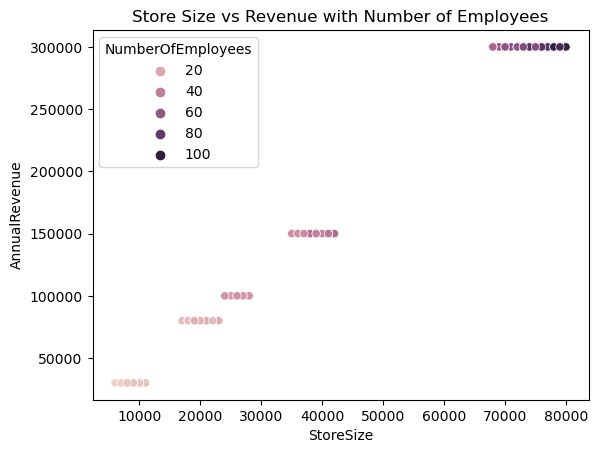

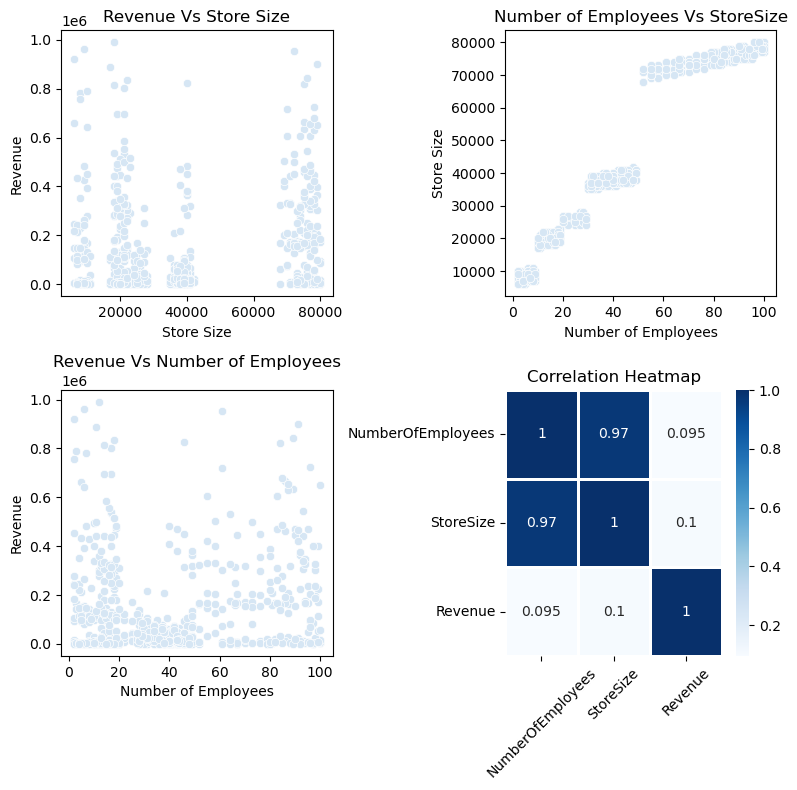

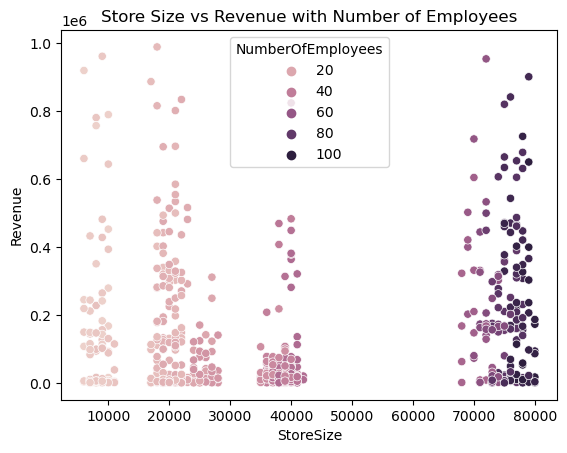

In [6]:
#Q6 What is the relationship between the size of the stores, number of employees and revenue?
#Again, I explored using the same two sets of revenue data starting with AnnualRevenue



fig, axs=plt.subplots(2, 2, figsize=(10,8))

sns.scatterplot(x='StoreSize', y='AnnualRevenue', data=StoreData, ax=axs[0, 0])
axs[0,0].set_title("Revenue Vs Store Size")
axs[0,0].set_xlabel("Store Size")

sns.scatterplot(x='NumberOfEmployees', y='AnnualRevenue', data=StoreData, ax=axs[1, 0])
axs[1,0].set_title("Revenue Vs Number of Employees")
axs[1,0].set_ylabel("Revenue")
axs[1,0].set_xlabel("Number of Employees")

sns.scatterplot(x='NumberOfEmployees', y='StoreSize', data=StoreData, ax=axs[0, 1])
axs[0, 1].set_title("Number of Employees Vs StoreSize")
axs[0, 1].set_xlabel("Number of Employees")
axs[0, 1].set_ylabel("Store Size")

corrdata2 = StoreData[['NumberOfEmployees', 'StoreSize', 'AnnualRevenue']]
corrmatrix2 = corrdata2.corr()
sns.heatmap(corrmatrix2, ax=axs[1,1], annot=True, linewidth=1, cmap="Blues")
axs[1, 1].set_title("Correlation Heatmap")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

sns.scatterplot(x='StoreSize', y='AnnualRevenue', hue = 'NumberOfEmployees', data=StoreData)
plt.title("Store Size vs Revenue with Number of Employees")
plt.show()

#I then repeated the analysis using revenue from the sales table

fig, axs= plt.subplots(2, 2, figsize=(8,8))

sns.scatterplot(x='StoreSize', y='Revenue', data=StoreData, ax=axs[0, 0])
axs[0,0].set_title("Revenue Vs Store Size")
axs[0,0].set_xlabel("Store Size")

sns.scatterplot(x='NumberOfEmployees', y='Revenue', data=StoreData, ax=axs[1, 0])
axs[1,0].set_title("Revenue Vs Number of Employees")
axs[1,0].set_ylabel("Revenue")
axs[1,0].set_xlabel("Number of Employees")

sns.scatterplot(x='NumberOfEmployees', y='StoreSize', data=StoreData, ax=axs[0, 1])
axs[0, 1].set_title("Number of Employees Vs StoreSize")
axs[0, 1].set_xlabel("Number of Employees")
axs[0, 1].set_ylabel("Store Size")

corrdata2 = StoreData[['NumberOfEmployees', 'StoreSize', 'Revenue']]
corrmatrix2 = corrdata2.corr()
sns.heatmap(corrmatrix2, ax=axs[1,1], annot=True, linewidth=1, cmap="Blues")
axs[1, 1].set_title("Correlation Heatmap")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

sns.scatterplot(x='StoreSize', y='Revenue', hue = 'NumberOfEmployees', data=StoreData)
plt.title("Store Size vs Revenue with Number of Employees")
plt.show()

